# Understand shape of variables (Univariate)

## Categorical - id

### Count Glaciers
Verify how many glaciers there are, evaluating the integrity of ID categories. 

The points data provides an expected count.

| Basic Statistic | Points Data | 
| --------------- | --------------- | 
| Number of glaciers    | 328116 (glacial_id) |  

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Check working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Ask pandas to display all columns
pd.set_option('display.max_columns', None)

Current Directory: /Users/yun/Documents/GLIMS/GLIMS_20230716


In [ ]:
# Load Esri shapefiles as geopandas dataframes
points = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_points.shp")
polygons = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_polygons.shp")
#polygons2 = gpd.read_file("GLIMS_20230716/polygons2.csv")

In [ ]:
# Remove submission-related columns
polygons1 = polygons.drop(labels=[
    'rec_status', 'wgms_id', 'local_id', 
    'subm_id', 'release_dt', 'proc_desc', 
    'rc_id', 'geog_area', 'chief_affl', 
    'loc_unc_x', 'loc_unc_y', 'glob_unc_x', 'glob_unc_y',
    'submitters', 'analysts'
], axis=1)

In [ ]:
# Remove non-glacier entities.
polygons2 = polygons1[polygons1.line_type=="glac_bound"]
#polygons2.line_type.value_counts()
polygons2.drop('line_type', axis=1, inplace=True)

In [23]:
# Verify that each point feature represents a unique glacier

# Number of points entries
print(points.shape[0])

# Unique points IDs
points.glacier_id.nunique()

328116


328116

In the glacial-subsetted polygons data, 
- Relatively few glaciers have names; this category may be trivial for now.
- polygons glac_id < points glacial_id. Perhaps some points were lost when subsetting glacial entities.
- glac_id << (geometries < anlyt_id < row entries). Perhaps many glaciers are analyzed more than once. Perhaps new analyses often but not always produce new geometries, reflecting changes in glacier size. Perhaps some glaciers are represented by more than one polygon.


| Basic Statistic | Points Data | Glacial Polygons Data | 
| --------------- | --------------- | --------------- |
| Number of glaciers    | 328116 (glacial_id) | 328112 (glac_id)  |
| Number of glacier analyses (snapshots)    | -  |      565887 (anlys_id)  |

In [24]:
# Row entries
print(polygons2.shape[0])

# Unique ids
polygons2[['anlys_id', 'glac_id', 'glac_name', 'geometry']].nunique()

564112


anlys_id     557878
glac_id      328112
glac_name     35111
geometry     528652
dtype: int64

However, in the non-subsetted polygons data including non-glacial entities, the number of unique glac_id is even closer to the expected glacier count. 

| Basic Statistic | Points Data | Polygons Data | Glacial Polygons Data | 
| --------------- | --------------- | --------------- | --------------- |
| Number of glaciers    | 328116 (glacial_id) |  328115 (glac_id)  |  328112 (glac_id)  |
| Number of glacier analyses (snapshots)    | - | -   |      565887 (anlys_id)  |

In [25]:
# Row entries
print(polygons.shape[0])

polygons[['anlys_id', 'glac_id', 'glac_name', 'geometry']].nunique()

565887


anlys_id     557884
glac_id      328115
glac_name     35112
geometry     530099
dtype: int64

### Resolve Discrepancies
Further inspection identifies the discrepancies. Perhaps they are yet to be studied further or had melted by the time they were researched (glacial area = 0).

,glacier_id,geometry
14810,G013275E47098N,POINT Z (13.27500 47.09800 0.00000)
150588,G087657E50098N,POINT Z (87.65700 50.09800 0.00000)
258013,G286571E47471S,POINT Z (-73.42900 -47.47100 0.00000)
259079,G286669E47411S,POINT Z (-73.33100 -47.41100 0.00000)


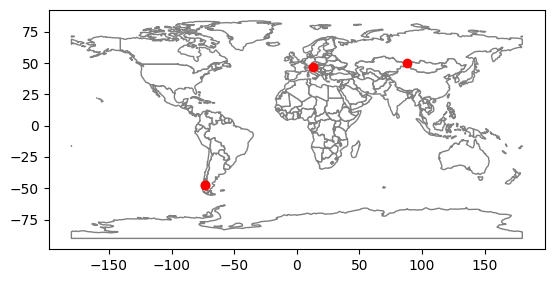

In [26]:
# points data entries not in polygons2 data
unaccounted2 = points[~points['glacier_id'].isin(polygons2['glac_id'])]

# map points data entries not in polygons2 data
ax2 = world.plot(color='white', edgecolor='grey');
unaccounted2.plot(ax=ax2, color = 'red');

unaccounted2

Here is the only glacier with a representative point but no polygon features.

,glacier_id,geometry
150588,G087657E50098N,POINT Z (87.65700 50.09800 0.00000)


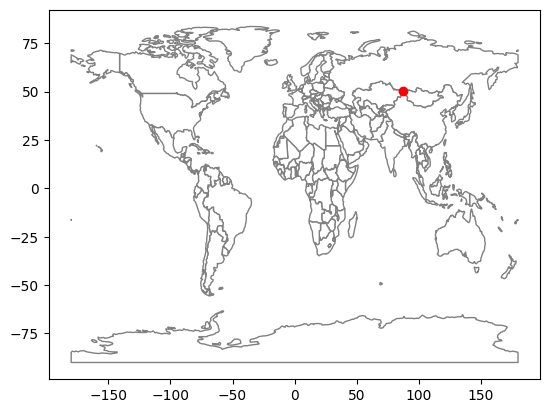

In [27]:
# points data entries not in polygons data
unaccounted = points[~points['glacier_id'].isin(polygons['glac_id'])]

# map points data entries not in polygons data
ax = world.plot(color='white', edgecolor='grey');
unaccounted.plot(ax=ax, color = 'red');

unaccounted

And here are the glaciers without glacial polygons, only nunatek polygons.

In [28]:
# glac_id that were lost in the subsetting
unnacounted21 = polygons[polygons.glac_id.isin(unaccounted2.glacier_id)]
unnacounted21

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
279735,intrnl_rock,346955.0,G013275E47098N,2012-06-30T00:00:00,0.00,0.098722,0.0,0.0,0.0,0.0,0.0,0.0,2012-06-30T00:00:00,okay,"Gstss Kees E,",None,None,exists,603.0,2016-03-07T09:00:00,"Where no lidar data were available,the GI 2 gl...",34.0,Austrian Alps,Universitaet Innsbruck,50,50,30,30,"Fischer, Andrea","Fischer, Andrea","POLYGON Z ((13.28654 47.09805 0.00000, 13.2865..."
351409,intrnl_rock,2152.0,G286571E47471S,2005-07-14T23:33:02,1.29,1.273130,0.0,0.0,0.0,0.0,0.0,0.0,2001-03-11T00:00:00,okay,None,50,NPI-50,None,100.0,2005-12-20T19:43:58,Manually digitised; A manually-based procedure...,20.0,"Chilean glaciers, between -18 and -56 degrees ...",Universidad de Chile,0,0,0,0,"Bown, Francisca","Rivera, Andres","POLYGON Z ((-73.42454 -47.46965 0.00000, -73.4..."
353371,intrnl_rock,2154.0,G286669E47411S,2005-07-14T23:33:02,1.00,0.999455,0.0,0.0,0.0,0.0,0.0,0.0,2001-03-11T00:00:00,okay,None,55,NPI-55,None,100.0,2005-12-20T19:43:58,Manually digitised; A manually-based procedure...,20.0,"Chilean glaciers, between -18 and -56 degrees ...",Universidad de Chile,0,0,0,0,"Bown, Francisca","Rivera, Andres","POLYGON Z ((-73.33914 -47.41311 0.00000, -73.3..."
353372,intrnl_rock,2154.0,G286669E47411S,2005-07-14T23:33:02,1.00,0.999455,0.0,0.0,0.0,0.0,0.0,0.0,2001-03-11T00:00:00,okay,None,55,NPI-55,None,100.0,2005-12-20T19:43:58,Manually digitised; A manually-based procedure...,20.0,"Chilean glaciers, between -18 and -56 degrees ...",Universidad de Chile,0,0,0,0,"Bown, Francisca","Rivera, Andres","POLYGON Z ((-73.33764 -47.41012 0.00000, -73.3..."


Considering these glaciers to have existed at least at some point, the points data provides the most complete count of glaciers.

### Compare Summary Statistics

These counts can be compared with the GLIMS [Summary Statistics](http://glims.colorado.edu/glacierdata/db_summary_stats.php) page (unknown date of last update, accessed Aug 3, 2023).

| Basic Statistic | EDA Counts | Summary Statistics Report | 
| --------------- | --------------- | --------------- |
| Number of glaciers    | 328116 (points glacial_id)    | 444740 (200,000)    | 
| Number of glacier analyses (snapshots)    | 565887 (polygons anlys_id)   | 699217    | 

The page notes that some glaciers were double-counted by having multiple glacier ID, that this problem would eventually be fixed, and that 200,000 was a reasonable estimate for the number of glaciers on earth. This may explain why the counts of this EDA are lower, if its data is more recent.

### Count Analyses
The page also states that 173148 glaciers have multi-temporal coverage. This means many glaciers were analyzed more than once, an explanation for glac_id << (geometries < anlyt_id < row entries). To demonstrate:

In [29]:
# EDA
print(565887 - 173148, "\u2248", 328116)

# GLIMS Summary Statistics Report
print(699217 - 173148, "\u2248", 565887)

392739 ≈ 328116
526069 ≈ 565887


In [30]:
# See some recurring glacier ids
polygons2.glac_id.value_counts()

G302228E64270S    75
G299054E63854S    33
G068799E49603S    29
G008010E46588N    22
G011972E47060N    21
                  ..
G285246E81397N     1
G286657E80112N     1
G280384E81976N     1
G288449E80529N     1
G278941E82406N     1
Name: glac_id, Length: 328112, dtype: int64

In [31]:
# Investigate one of the recurring glacier ids.
# Each of its rows are unique - in which fields do they differ?
G011972E47060N = polygons2[polygons2.glac_id=="G011972E47060N"]
G011972E47060N.duplicated()

264610    False
277696    False
278454    False
278455    False
278456    False
278457    False
278458    False
278459    False
278460    False
280076    False
280077    False
280078    False
280079    False
280080    False
280081    False
280082    False
329749    False
380530    False
556594    False
556595    False
556596    False
dtype: bool

In [32]:
# In which fields do they differ?
# Some have different anlys_id and anlys_time entries
G011972E47060N.head()

In [33]:
# The rest have differing geometry
G011972E47060N.iloc[2] == G011972E47060N.iloc[3]

NameError: name 'stop' is not defined

In [ ]:
# Apparently these disconnected polygons belong to the same glacier ID
G011972E47060Nab=G011972E47060N.iloc[2:4]
G011972E47060Nab.plot(cmap='Paired');

In [ ]:

# Map examples of glacier size changes/stability across analyses

# Map example of glacier having >1 glacial polygons. 

## Categorical - non-id

In [ ]:
# Change datatype of primeclass column
polygons3['primeclass'] = polygons3['primeclass'].astype('category')
polygons3.dtypes

# A few hundred glaciers are gone; None means data NA
plt.bar(polygons3.glac_stat.value_counts().index, polygons3.glac_stat.value_counts().values);
polygons3.glac_stat.value_counts()

#Perhaps number of gone glaciers consistent with number of zero area glaciers (db_area)
dimensions.eq(0).sum()

# Most glaciers are in the uncertain / misc category
plt.bar(polygons3.primeclass.value_counts().index, polygons3.primeclass.value_counts().values);
polygons3.primeclass.value_counts()


#cats = polygons3[['primeclass','glac_stat']]
#cats.groupby(['glac_stat','primeclass']).size().unstack(fill_value=0).plot(kind='bar');

## Continuous - T

Which time field(s) are useful and pertain to other measurement fields? The User Guide does not mention anlys_time, while the GLIMS Description of fields describes anlys_time as when analysis was carried out. Both associate src_date with the glacier outlines. Exploration is inconclusive.

According to the [Summary Statistics](http://glims.colorado.edu/glacierdata/db_summary_stats.php) page, 173007 out of 444633 glaciers have multitemporal coverage.

In [ ]:
polygons2.iloc[:,[3,12]]

In [ ]:
# convert time columns to datetime format
polygons3=polygons2
polygons3['anlys_time'] = pd.to_datetime(polygons3['anlys_time'])
polygons3['src_date'] = pd.to_datetime(polygons3['src_date'])
polygons3.dtypes

In [ ]:
polygons3.iloc[:,[3,12]].sample(10)

In [ ]:
polygons3.iloc[:,[3,12]].describe()

In [ ]:
# src_date is usually older than anlys_time, but not always. Not sure why.
timely = polygons3['anlys_time'] > polygons3['src_date']
timely.value_counts()

In [ ]:
# Visualization confirms src_date tends to be older.
polygons3.src_date.hist(label='src_date');
polygons3.anlys_time.hist(label='anlys_time');
plt.title('anlys_time');
plt.legend();

## Continuous - Elevation
Half of glaciers have elevations around sealevel, and a few below, which seems dubious as they are usually high in the mountains.

In [ ]:
elevations = polygons3.iloc[:, 9:12]
elevations

In [ ]:
elevations.hist();
plt.tight_layout();

In [ ]:
# Elevations have many zero values and a few negative values...?
plt.style.use('default')
plt.hist(elevations.min_elev, alpha=0.5, bins=30, label='Min Elevation')
plt.hist(elevations.mean_elev, alpha=0.5, bins=30, label='Mean Elevation')
plt.hist(elevations.max_elev, alpha=0.5, bins=30, label='Max Elevation')
plt.legend();
plt.title('Elevations');

In [ ]:
elevations.describe()

In [ ]:
# Quite a lot of data near zero (glaciers at sea level)
plt.violinplot(elevations);

In [ ]:
# Nearly half or more are zero
elevations.eq(0).sum() / elevations.shape[0]

In [ ]:
# Nearly half of the zeros coincide --- real or no data?
elevations[elevations.min_elev == elevations.max_elev].eq(0).sum() / elevations.shape[0]

In [ ]:
# Negative values only seem to be around -10000 ...?
elevations.boxplot(flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'});

In [ ]:
# These few glaciers are below sealevel
print(len(polygons3[polygons3.min_elev<0]))
print(len(polygons3[polygons3.mean_elev<0]))
print(len(polygons3[polygons3.max_elev<0]))

In [ ]:
# Most of them coincide
print(polygons3[ (polygons3.min_elev<0) & (polygons3.mean_elev<0) & (polygons3.max_elev<0)].shape)
print(polygons3[ (polygons3.min_elev<0) | (polygons3.mean_elev<0) | (polygons3.max_elev<0)].shape)

In [ ]:
# Where are they? Create of subset of these low glaciers for visualization
submarine = polygons3[ (polygons3.min_elev<0) | (polygons3.mean_elev<0) | (polygons3.max_elev<0)]
submarine.shape, submarine.crs 

In [ ]:
# They seem to be in NW USA and Nepal. Data errors?
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, edgecolor = 'black', linewidth=0.2);
submarine['geometry'].centroid.plot(ax=ax, marker='.', color='red', markersize=10);
ax.set_xlim(submarine.total_bounds[0]-5, submarine.total_bounds[2]+5)
ax.set_ylim(submarine.total_bounds[1]-5, submarine.total_bounds[3]+5)

## Continuous - Area

Area of glacier coverage (latest snapshot), km2	1.20007e+06
Note: A good working number for area is approximately 750,000 km2 (not including the ice sheets of Greenland and Antarctica).
Earliest analysis	1750-01-01
Most recent analysis	2021-02-26
Number of glaciers with multi-temporal coverage	173148






db_area, calculated by the NSIDC, seems quite complete. 

area may be less complete, and width and length seem highly incomplete.


In [ ]:
dimensions = polygons3.iloc[:, 4:8]
dimensions

In [ ]:
dimensions.hist();
plt.tight_layout();

In [ ]:
dimensions.describe()

In [ ]:
# their scales are quite different
dimensions.boxplot(flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'});

In [ ]:
# most of the data is around zero
fig, axs = plt.subplots(2, 4)
axs[0, 0].boxplot(dimensions.area, flierprops={'marker': 'o', 'markersize': 5,  'markerfacecolor': 'red'});
axs[0, 1].violinplot(dimensions.area);
axs[0, 2].boxplot(dimensions.db_area, flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'});
axs[0, 3].violinplot(dimensions.db_area);
axs[1, 0].boxplot(dimensions.width, flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'});
axs[1, 1].violinplot(dimensions.width);
axs[1, 2].boxplot(dimensions.length, flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'});
axs[1, 3].violinplot(dimensions.length);

In [ ]:
# width and length are almost all zero - because of lack of data?
# area also has substantial zeros, while db_area has hardly any zeroes
dimensions.eq(0).sum() / dimensions.shape[0]